## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from tqdm import tqdm
from matplotlib import pyplot as plt
from TCGame_Env import TicTacToe
%matplotlib inline

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

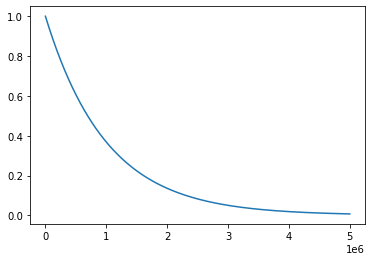

In [5]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
epsilon = []
max_epsilon = 1.0
min_epsilon = 0.001

episodes = np.arange(0, 5000000)

for episode in episodes:
    epsilon.append(min_epsilon +
                   (max_epsilon - min_epsilon) * np.exp(-0.000001 * episode))

plt.plot(episodes, epsilon)

plt.show()


In [6]:
# Defining epsilon-greedy policy.
def epsilon_greedy(state, time):
    max_epsilon = 1.0
    min_epsilon = 0.001

    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*time)
    z = np.random.random()       
    if z > epsilon:
        action = max(Q_dict[Q_state(state)],key=Q_dict[Q_state(state)].get)
    else:
        action = random.sample(valid_actions(state),1)[0]   
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [7]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

In [8]:
# Initialise states to be tracked
def initialise_tracking_states():
    state_action_pairs = [
                       ('x-x-x-x-6-x-9-x-x', (0, 1)),
                       ('x-6-x-x-3-x-x-x-x', (0, 5)),
                       ('x-x-x-5-x-x-2-x-x', (2, 7)),
                       ('x-x-x-x-9-4-x-x-x', (2, 3)),
                       ('x-x-x-x-x-x-8-x-7', (3, 5)),
                       ('x-x-x-x-x-5-x-8-x', (1, 1)),
                       ('7-x-x-x-6-x-x-x-x', (2, 9)),
                       ('x-x-x-x-4-x-5-x-x', (0, 9)),
                       ('x-x-x-x-x-x-6-x-1', (0, 3)),
                       ('5-x-6-x-x-x-x-x-x', (4, 7)),
                       ]
    
    for state_action_pair in state_action_pairs:
        state = state_action_pair[0]
        action = state_action_pair[1]
        States_track[state][action] = []

In [9]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [10]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [11]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [12]:
EPISODES = 5000000  
LR = 0.01
GAMMA = 0.91
checkpoint_state_tracking = 1000
checkpoint_print_episodes = 100000

### Q-update loop ---write your code here

In [13]:
start_time = time.time()

q_values={}
q_values['x-x-x-x-6-x-9-x-x'] = []
q_values['x-6-x-x-3-x-x-x-x'] = []
q_values['x-x-x-5-x-x-2-x-x'] = []
q_values['x-x-x-x-9-4-x-x-x'] = []
q_values['x-x-x-x-x-x-8-x-7'] = []
q_values['x-x-x-x-x-5-x-8-x'] = []
q_values['7-x-x-x-6-x-x-x-x'] = []
q_values['x-x-x-x-4-x-5-x-x'] = []
q_values['x-x-x-x-x-x-6-x-1'] = []
q_values['5-x-6-x-x-x-x-x-x'] = []
                 
num_of_agent_wins = 0
num_of_environment_wins = 0
num_of_ties = 0

for episode in tqdm(range(EPISODES)):
    
    env = TicTacToe()
    
    # generate a fresh state for the present environment
    present_state = env.state
    is_terminal_state = False

    # add current state to Q - dictionary for Q - learning
    add_to_dict(present_state)
    
    # make rewards and total_rewards set to 0
    rewards = total_rewards = 0
    
    # loop till the game comes to an end ( agent_win or env_win or tie)
    while not(is_terminal_state):
        present_action = epsilon_greedy(present_state, episode)
    
        if Q_state(present_state) in q_values.keys():
            q_values[Q_state(present_state)].append(present_action)

        next_state,rewards,is_terminal_state, msg = env.step(present_state,present_action) 

        present_lookup = Q_state(present_state)
        next_lookup = Q_state(next_state)

        if is_terminal_state:
            q_max = 0
            
            # Tracking the count of games won by agent and environment and the number of ties
            if msg == "Agent Won!":
                num_of_agent_wins += 1
            elif msg == "Environment Won!":
                num_of_environment_wins += 1
            else:
                num_of_ties += 1
        else:
            add_to_dict(next_state)
            max_next = max(Q_dict[next_lookup],key=Q_dict[next_lookup].get)
            q_max = Q_dict[next_lookup][max_next]

        Q_dict[present_lookup][present_action] += LR * ((rewards + (GAMMA * (q_max))) - Q_dict[present_lookup][present_action]) 
        present_state = next_state

        total_rewards += rewards

    if ((episode + 1) % checkpoint_state_tracking) == 0:   
        save_tracking_states()

    if ((episode + 1) % checkpoint_print_episodes) == 0:
        print("After playing %d games, Agent Won : %.4f, Environment Won : %.4f, Tie(s) : %.4f"
            % (episode + 1, num_of_agent_wins / (episode + 1), num_of_environment_wins /
               (episode + 1), num_of_ties / (episode + 1)))
        
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')
save_obj(Q_dict,'Policy')
print('Total Execution time: ', elapsed_time)

  2%|▏         | 100297/5000000 [01:01<49:46, 1640.36it/s] 

After playing 100000 games, Agent Won : 0.2521, Environment Won : 0.2836, Tie(s) : 0.4643


  4%|▍         | 200265/5000000 [02:05<50:13, 1592.70it/s]  

After playing 200000 games, Agent Won : 0.2530, Environment Won : 0.2831, Tie(s) : 0.4639


  6%|▌         | 300276/5000000 [03:07<45:49, 1709.26it/s]  

After playing 300000 games, Agent Won : 0.2550, Environment Won : 0.2822, Tie(s) : 0.4627


  8%|▊         | 400326/5000000 [04:07<44:10, 1735.51it/s]  

After playing 400000 games, Agent Won : 0.2591, Environment Won : 0.2802, Tie(s) : 0.4607


 10%|█         | 500335/5000000 [05:05<40:31, 1850.45it/s]  

After playing 500000 games, Agent Won : 0.2637, Environment Won : 0.2775, Tie(s) : 0.4588


 12%|█▏        | 600302/5000000 [05:59<39:26, 1859.17it/s]

After playing 600000 games, Agent Won : 0.2686, Environment Won : 0.2749, Tie(s) : 0.4565


 14%|█▍        | 700205/5000000 [06:52<36:52, 1943.58it/s]

After playing 700000 games, Agent Won : 0.2750, Environment Won : 0.2718, Tie(s) : 0.4532


 16%|█▌        | 800308/5000000 [07:44<36:32, 1915.19it/s]

After playing 800000 games, Agent Won : 0.2809, Environment Won : 0.2688, Tie(s) : 0.4503


 18%|█▊        | 900208/5000000 [08:35<36:31, 1870.92it/s]

After playing 900000 games, Agent Won : 0.2873, Environment Won : 0.2660, Tie(s) : 0.4467


 20%|██        | 1000313/5000000 [09:29<34:04, 1955.95it/s]

After playing 1000000 games, Agent Won : 0.2939, Environment Won : 0.2631, Tie(s) : 0.4430


 22%|██▏       | 1100222/5000000 [10:21<32:52, 1977.13it/s]

After playing 1100000 games, Agent Won : 0.3009, Environment Won : 0.2600, Tie(s) : 0.4391


 24%|██▍       | 1200224/5000000 [11:13<31:41, 1998.78it/s]

After playing 1200000 games, Agent Won : 0.3082, Environment Won : 0.2572, Tie(s) : 0.4346


 26%|██▌       | 1300314/5000000 [12:03<33:52, 1820.28it/s]

After playing 1300000 games, Agent Won : 0.3155, Environment Won : 0.2545, Tie(s) : 0.4300


 28%|██▊       | 1400335/5000000 [12:52<26:37, 2252.95it/s]

After playing 1400000 games, Agent Won : 0.3230, Environment Won : 0.2517, Tie(s) : 0.4253


 30%|███       | 1500425/5000000 [13:37<26:16, 2219.39it/s]

After playing 1500000 games, Agent Won : 0.3304, Environment Won : 0.2489, Tie(s) : 0.4207


 32%|███▏      | 1600322/5000000 [14:21<23:59, 2361.77it/s]

After playing 1600000 games, Agent Won : 0.3383, Environment Won : 0.2460, Tie(s) : 0.4157


 34%|███▍      | 1700376/5000000 [15:00<21:00, 2618.11it/s]

After playing 1700000 games, Agent Won : 0.3553, Environment Won : 0.2398, Tie(s) : 0.4049


 36%|███▌      | 1800411/5000000 [15:38<19:59, 2667.06it/s]

After playing 1800000 games, Agent Won : 0.3751, Environment Won : 0.2325, Tie(s) : 0.3923


 38%|███▊      | 1900513/5000000 [57:18<19:45, 2614.92it/s]   

After playing 1900000 games, Agent Won : 0.3947, Environment Won : 0.2253, Tie(s) : 0.3800


 40%|████      | 2000530/5000000 [57:56<19:29, 2565.14it/s]

After playing 2000000 games, Agent Won : 0.4138, Environment Won : 0.2183, Tie(s) : 0.3678


 42%|████▏     | 2100337/5000000 [58:32<18:28, 2616.55it/s]

After playing 2100000 games, Agent Won : 0.4324, Environment Won : 0.2116, Tie(s) : 0.3560


 44%|████▍     | 2200477/5000000 [59:08<16:14, 2872.87it/s]

After playing 2200000 games, Agent Won : 0.4501, Environment Won : 0.2051, Tie(s) : 0.3448


 46%|████▌     | 2300469/5000000 [59:42<15:52, 2834.37it/s]

After playing 2300000 games, Agent Won : 0.4670, Environment Won : 0.1990, Tie(s) : 0.3340


 48%|████▊     | 2400429/5000000 [1:00:16<15:35, 2780.22it/s]

After playing 2400000 games, Agent Won : 0.4832, Environment Won : 0.1932, Tie(s) : 0.3237


 50%|█████     | 2500516/5000000 [1:00:51<15:03, 2767.37it/s]

After playing 2500000 games, Agent Won : 0.4983, Environment Won : 0.1877, Tie(s) : 0.3140


 52%|█████▏    | 2600431/5000000 [1:01:25<14:30, 2757.49it/s]

After playing 2600000 games, Agent Won : 0.5128, Environment Won : 0.1824, Tie(s) : 0.3048


 54%|█████▍    | 2700343/5000000 [1:01:58<12:08, 3158.79it/s]

After playing 2700000 games, Agent Won : 0.5264, Environment Won : 0.1774, Tie(s) : 0.2961


 56%|█████▌    | 2800565/5000000 [1:02:31<11:58, 3059.24it/s]

After playing 2800000 games, Agent Won : 0.5394, Environment Won : 0.1727, Tie(s) : 0.2879


 58%|█████▊    | 2900588/5000000 [1:03:04<11:26, 3057.75it/s]

After playing 2900000 games, Agent Won : 0.5516, Environment Won : 0.1682, Tie(s) : 0.2801


 60%|██████    | 3000518/5000000 [1:03:37<10:40, 3120.32it/s]

After playing 3000000 games, Agent Won : 0.5633, Environment Won : 0.1640, Tie(s) : 0.2727


 62%|██████▏   | 3100440/5000000 [1:04:10<11:43, 2699.13it/s]

After playing 3100000 games, Agent Won : 0.5745, Environment Won : 0.1599, Tie(s) : 0.2657


 64%|██████▍   | 3200629/5000000 [1:04:44<09:39, 3103.75it/s]

After playing 3200000 games, Agent Won : 0.5850, Environment Won : 0.1560, Tie(s) : 0.2590


 66%|██████▌   | 3300648/5000000 [1:05:17<09:14, 3062.78it/s]

After playing 3300000 games, Agent Won : 0.5951, Environment Won : 0.1523, Tie(s) : 0.2526


 68%|██████▊   | 3400507/5000000 [1:05:49<08:53, 2998.33it/s]

After playing 3400000 games, Agent Won : 0.6047, Environment Won : 0.1488, Tie(s) : 0.2464


 70%|███████   | 3500484/5000000 [1:06:22<08:14, 3032.67it/s]

After playing 3500000 games, Agent Won : 0.6139, Environment Won : 0.1455, Tie(s) : 0.2407


 72%|███████▏  | 3600520/5000000 [1:06:54<07:29, 3115.43it/s]

After playing 3600000 games, Agent Won : 0.6227, Environment Won : 0.1422, Tie(s) : 0.2351


 74%|███████▍  | 3700357/5000000 [1:07:27<07:02, 3077.34it/s]

After playing 3700000 games, Agent Won : 0.6310, Environment Won : 0.1392, Tie(s) : 0.2298


 76%|███████▌  | 3800414/5000000 [1:07:59<06:29, 3082.46it/s]

After playing 3800000 games, Agent Won : 0.6390, Environment Won : 0.1362, Tie(s) : 0.2247


 78%|███████▊  | 3900370/5000000 [1:08:31<05:39, 3238.90it/s]

After playing 3900000 games, Agent Won : 0.6467, Environment Won : 0.1334, Tie(s) : 0.2199


 80%|████████  | 4000299/5000000 [1:11:51<14:19, 1163.74it/s] 

After playing 4000000 games, Agent Won : 0.6540, Environment Won : 0.1307, Tie(s) : 0.2153


 82%|████████▏ | 4100353/5000000 [1:12:25<04:40, 3204.01it/s]

After playing 4100000 games, Agent Won : 0.6610, Environment Won : 0.1282, Tie(s) : 0.2108


 84%|████████▍ | 4200566/5000000 [1:12:57<04:24, 3017.06it/s]

After playing 4200000 games, Agent Won : 0.6677, Environment Won : 0.1257, Tie(s) : 0.2066


 86%|████████▌ | 4300622/5000000 [1:13:29<03:43, 3125.00it/s]

After playing 4300000 games, Agent Won : 0.6741, Environment Won : 0.1233, Tie(s) : 0.2025


 88%|████████▊ | 4400412/5000000 [1:14:00<03:15, 3066.08it/s]

After playing 4400000 games, Agent Won : 0.6803, Environment Won : 0.1211, Tie(s) : 0.1986


 90%|█████████ | 4500471/5000000 [1:14:32<02:44, 3045.18it/s]

After playing 4500000 games, Agent Won : 0.6862, Environment Won : 0.1189, Tie(s) : 0.1949


 92%|█████████▏| 4600474/5000000 [1:15:04<02:06, 3145.97it/s]

After playing 4600000 games, Agent Won : 0.6919, Environment Won : 0.1168, Tie(s) : 0.1913


 94%|█████████▍| 4700388/5000000 [1:15:36<01:37, 3070.88it/s]

After playing 4700000 games, Agent Won : 0.6974, Environment Won : 0.1148, Tie(s) : 0.1878


 96%|█████████▌| 4800478/5000000 [1:16:08<01:01, 3234.91it/s]

After playing 4800000 games, Agent Won : 0.7027, Environment Won : 0.1128, Tie(s) : 0.1845


 98%|█████████▊| 4900492/5000000 [1:16:40<00:32, 3077.60it/s]

After playing 4900000 games, Agent Won : 0.7078, Environment Won : 0.1110, Tie(s) : 0.1813


100%|██████████| 5000000/5000000 [1:17:12<00:00, 1079.42it/s]


After playing 5000000 games, Agent Won : 0.7127, Environment Won : 0.1092, Tie(s) : 0.1782
Total Execution time:  4632.132039070129


#### Check the Q-dictionary

In [14]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.3035932802194488,
              (0, 3): -1.270638273522064,
              (0, 5): -0.8747610240189282,
              (0, 7): -1.3666752716524306,
              (0, 9): -1.3170011621882638,
              (1, 1): -1.354537405437344,
              (1, 3): -1.341131400148925,
              (1, 5): -1.2973946293458456,
              (1, 7): -1.3367215456296828,
              (1, 9): -1.3045587771801794,
              (2, 1): -1.325693113373854,
              (2, 3): -0.7879086266614973,
              (2, 5): -1.3334586968963373,
              (2, 7): -1.3481750449347014,
              (2, 9): -1.2783971239047782,
              (3, 1): -1.3219797305033547,
              (3, 3): 1.5429307612369931,
              (3, 5): -1.1678109083798283,
              (3, 7): -1.3116447638353108,
              (3, 9): -1.282539053476238,
              (4, 1): -1.2577635262381817,
              (4, 3): -1.2887881454136603,
              (4, 5):

In [15]:
len(Q_dict)

1758992

In [16]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated

# get top three best actions
from heapq import nlargest
from operator import itemgetter

flattened = ((outerkey, innerkey, value) for outerkey, innerdict in Q_dict.items() 
                 for innerkey, value in innerdict.items())
result = nlargest(3, flattened, key=itemgetter(2))
result

[('x-x-3-4-6-x-7-x-x', (5, 5), 9.999999999999911),
 ('x-x-6-3-x-8-7-x-x', (0, 5), 9.999999999999911),
 ('5-x-x-x-x-8-7-x-2', (3, 3), 9.999999999999911)]

#### Check the states tracked for Q-values convergence
(non-evaluative)

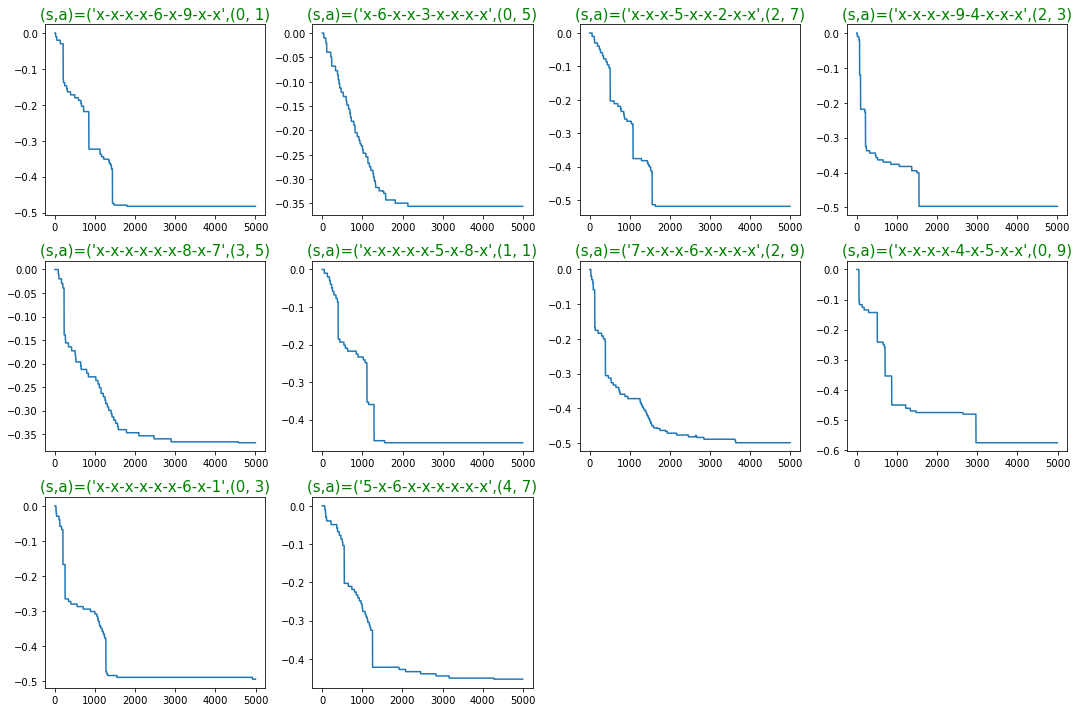

In [69]:
# Write the code for plotting the graphs for state-action pairs tracked
fig = plt.figure(figsize=(15, 10))
counter = 1

# iterate through items in States_track
for k,v in States_track.items() :
    plt.subplot(3, 4, counter)
    t1 = States_track[str(k)][list(v.keys())[0]]
    plt.title("(s,a)=('" + str(k) + "'," + str(list(v.keys())[0]), fontdict = {'fontsize' : 15, 'color':'green'})
    plt.plot(np.asarray(range(0, len(t1))),np.asarray(t1)) 
    counter = counter + 1
plt.tight_layout()

In [70]:
# Draw the plots for the first half of numeric features
#fig = plt.figure(figsize=(15, 10))
#plt.subplot(3,4,1)
#t1=States_track['x-x-x-x-6-x-9-x-x'][(0,1)]
#plt.title("(s,a)=('x-x-x-x-6-x-9-x-x', (0, 1))", fontdict = {'fontsize' : 18, 'color':'green'})
#plt.plot(np.asarray(range(0, len(t1))),np.asarray(t1))  

#plt.subplot(3,4,2)
#t1=States_track['x-6-x-x-3-x-x-x-x'][(0, 5)]
#plt.title("(s,a)=('x-6-x-x-3-x-x-x-x', (0, 5))", fontdict = {'fontsize' : 18, 'color':'green'})
#plt.plot(np.asarray(range(0, len(t1))),np.asarray(t1))  

#plt.subplot(3,4,3)
#t1=States_track['x-x-x-5-x-x-2-x-x'][(2, 7)]
#plt.title("(s,a)=('x-x-x-5-x-x-2-x-x', (2, 7))", fontdict = {'fontsize' : 18, 'color':'green'})
#plt.plot(np.asarray(range(0, len(t1))),np.asarray(t1))  

#plt.subplot(3,4,4)
#t1=States_track['x-x-x-x-9-4-x-x-x'][(2, 3)]
#plt.title("(s,a)=('x-x-x-x-9-4-x-x-x', (2, 3))", fontdict = {'fontsize' : 18, 'color':'green'})
#plt.plot(np.asarray(range(0, len(t1))),np.asarray(t1))  

#plt.subplot(3,4,5)
#t1=States_track['x-x-x-x-x-x-8-x-7'][(3, 5)]
#plt.title("(s,a)=('x-x-x-x-x-x-8-x-7', (3, 5))", fontdict = {'fontsize' : 18, 'color':'green'})
#plt.plot(np.asarray(range(0, len(t1))),np.asarray(t1))  

#plt.subplot(3,4,6)
#t1=States_track['x-x-x-x-x-5-x-8-x'][(1, 1)]
#plt.title("(s,a)=('x-x-x-x-x-5-x-8-x', (1, 1))", fontdict = {'fontsize' : 18, 'color':'green'})
#plt.plot(np.asarray(range(0, len(t1))),np.asarray(t1))  

#plt.subplot(3,4,7)
#t1=States_track['7-x-x-x-6-x-x-x-x'][(2, 9)]
#plt.title("(s,a)=('7-x-x-x-6-x-x-x-x', (2, 9))", fontdict = {'fontsize' : 15, 'color':'green'})
#plt.plot(np.asarray(range(0, len(t1))),np.asarray(t1))  

#plt.subplot(3,4,8)
#t1=States_track['x-x-x-x-4-x-5-x-x'][(0, 9)]
#plt.title("(s,a)=('x-x-x-x-4-x-5-x-x', (0, 9))", fontdict = {'fontsize' : 15, 'color':'green'})
#plt.plot(np.asarray(range(0, len(t1))),np.asarray(t1))  

#plt.subplot(3,4,9)
#t1=States_track['x-x-x-x-x-x-6-x-1'][(0, 3)]
#plt.title("(s,a)=('x-x-x-x-x-x-6-x-1', (0, 3))", fontdict = {'fontsize' : 15, 'color':'green'})
#plt.plot(np.asarray(range(0, len(t1))),np.asarray(t1))  

#plt.subplot(3,4,10)
#t1=States_track['5-x-6-x-x-x-x-x-x'][(4, 7)]
#plt.title("(s,a)=('5-x-6-x-x-x-x-x-x', (4, 7))", fontdict = {'fontsize' : 15, 'color':'green'})
#plt.plot(np.asarray(range(0, len(t1))),np.asarray(t1)) 

#plt.tight_layout()

### Epsilon - decay check

In [19]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

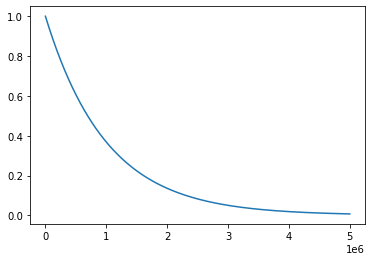

In [20]:
plt.plot(time, epsilon)
plt.show()